<a href="https://colab.research.google.com/github/johan1124/Actividades_Aprendizaje-/blob/main/modulo-4/SVM-Equipo57.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [225]:
import pandas as pd
import numpy as np

#split
from sklearn.model_selection import train_test_split

#graficos
import matplotlib.pyplot as plt 
import seaborn as sns

#transformaciones
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier

#metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import confusion_matrix

#busqueda
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

#modelos
from sklearn import svm

#curvas
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, plot_roc_curve, recall_score, roc_auc_score

#**Ejercicio-1.** 

In [ ]:
#Lectura del archivo
#path dataset
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'

#read data set as pandas data frame
original = pd.read_csv(path, sep = " ", header=None)
original.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]

df = original.copy()

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['A15'], axis= 1), df['A15'], test_size=.15, random_state=0)

In [ ]:
y_train.value_counts()

0    325
1    261
Name: A15, dtype: int64

In [ ]:
y_test.value_counts()

0    58
1    46
Name: A15, dtype: int64

In [ ]:
261/(325+261)

0.4453924914675768

In [ ]:
46/(58+46)

0.4423076923076923

#**Ejercicio-2.**

In [ ]:
#transformación de los datos 

In [ ]:
df.isnull().any()

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
dtype: bool

In [ ]:
categorical_columns = ['A1','A4','A5','A6','A8','A9','A11','A12']
numerical_columns = ['A2','A3','A7','A10','A13','A14']

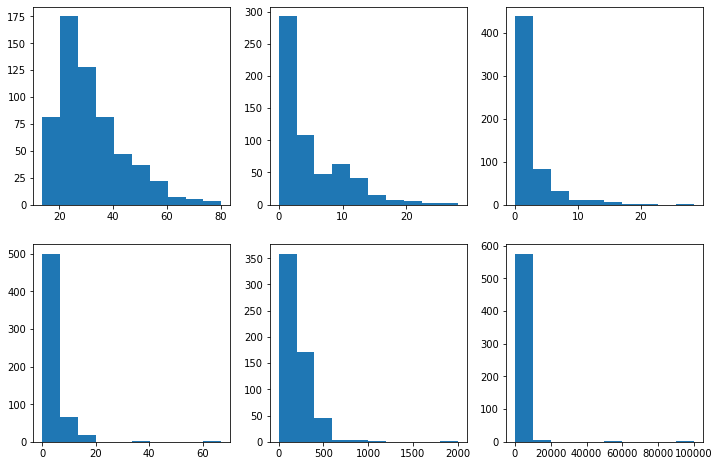

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (12,8))

for i, var in enumerate(numerical_columns):
  plt.subplot(2,3,i+1)
  plt.hist(X_train[var])

In [ ]:
#Pipe Categoricas
categorical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                       ('encoder', OneHotEncoder(handle_unknown="ignore", sparse = False))])
#Pipe Numericas
numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                     ('scaler_num', PowerTransformer(method = 'yeo-johnson')),
                                     ('scaler', MinMaxScaler((1,2)))])

In [ ]:
#Transformers
colum_transformer = ColumnTransformer(transformers=[('numerical_transformer', numerical_pipeline, numerical_columns),
                                                    ('categorical_transformer',categorical_pipeline, categorical_columns)],
                                      remainder='passthrough')

X_t_fit = colum_transformer.fit(X_train)

X_train_t = X_t_fit.transform(X_train)
X_test_t = X_t_fit.transform(X_test)

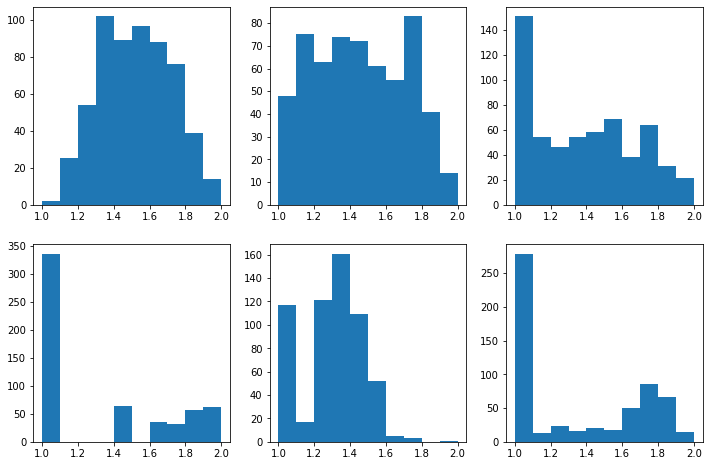

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (12,8))

for i, var in enumerate(numerical_columns):
  plt.subplot(2,3,i+1)
  plt.hist(X_train_t[:,i])

#**Ejercicio-3.**

In [ ]:
X_train_dummy, X_valid_dummy, y_train_dummy, y_valid_dummy = train_test_split(X_train_t, y_train, test_size = 100, random_state=0)
dummy_regr = DummyClassifier(strategy="stratified")

dummy_model = dummy_regr.fit(X_train_dummy,y_train_dummy)

y_pred_train = dummy_model.predict(X_train_dummy)
y_pred_valid = dummy_model.predict(X_valid_dummy)
#f1_score(y_true, y_pred, average=None)
#precision_score(y_true, y_pred, average=None)
#recall_score(y_true, y_pred, average=None)

#accuracy_score(y_true, y_pred)
#print('Accuracy_score Entrenamiento: ' + str(accuracy_score(y_train_dummy,y_pred_train)) +
#      '\Accuracy_score Validación: ' + str(accuracy_score(y_valid_dummy,y_pred_valid))
#    )

print('Accuracy_score Entrenamiento: ' + str(accuracy_score(y_train_dummy,y_pred_train)) +
      '\Accuracy_score Validación: ' + str(accuracy_score(y_valid_dummy,y_pred_valid)) +
      '\nF1_score Entrenamineto: ' + str(f1_score(y_train_dummy,y_pred_train)) +
      '\nF1_score Validación: ' + str(f1_score(y_valid_dummy,y_pred_valid)) +
      '\nPrecision_score Entrenamineto: ' + str(precision_score(y_train_dummy,y_pred_train)) +
      '\nPrecision_score Validación: ' + str(precision_score(y_valid_dummy,y_pred_valid))+
      '\nRecall_score Entrenamineto: ' + str(recall_score(y_train_dummy,y_pred_train)) +
      '\nRecall_score Validación: ' + str(recall_score(y_valid_dummy,y_pred_valid))
    )

Accuracy_score Entrenamiento: 0.5\Accuracy_score Validación: 0.52
F1_score Entrenamineto: 0.45393258426966293
F1_score Validación: 0.4666666666666667
Precision_score Entrenamineto: 0.4488888888888889
Precision_score Validación: 0.42857142857142855
Recall_score Entrenamineto: 0.4590909090909091
Recall_score Validación: 0.5121951219512195


#**Ejercicio-4.**

In [ ]:
_metrics = ['accuracy', 'f1', 'precision', 'recall']

In [ ]:
modelo_svm_gs = svm.SVC()
kfold = RepeatedKFold(n_splits=5, n_repeats=3)

Parametros = {'C': [1.0, 0.5,0.1, 5.0,10.0],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']
              }

svm_gridFinal = GridSearchCV(estimator=modelo_svm_gs, param_grid = Parametros, scoring = _metrics, refit = 'accuracy', cv = kfold, n_jobs=-1)
                            
svm_gridFinal.fit(X_train_t, np.ravel(y_train))

svm_best_score = svm_gridFinal.best_score_
svm_best_param = svm_gridFinal.best_params_
print("El mejor score es:", svm_best_score)
print("El mejor parametro es: \n", svm_best_param)

El mejor score es: 0.8674247911536049
El mejor parametro es: 
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


#**Ejercicio-5.**

In [ ]:
modelo_svm_F = svm.SVC(probability = True)
modelo_svm_F.set_params(**svm_best_param)

kfold = RepeatedKFold(n_splits=5, n_repeats=3)

scores = cross_validate(
                        estimator = modelo_svm_F,
                        X = X_train_t,
                        y = y_train.ravel(),
                        scoring=_metrics,
                        cv = kfold,
                        return_train_score=True
                        )

In [ ]:
train_rr=[]
val_rr=[]
for metric in _metrics:

  train_rr.append(scores['train_' + metric])
  val_rr.append(scores['test_' + metric])


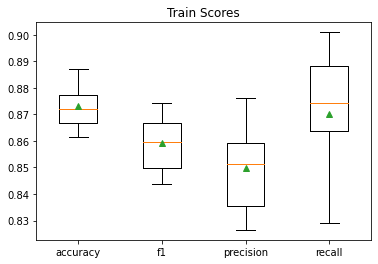

In [ ]:
plt.boxplot(train_rr, labels=_metrics, showmeans=True, showfliers = False)
plt.title('Train Scores')
plt.show()

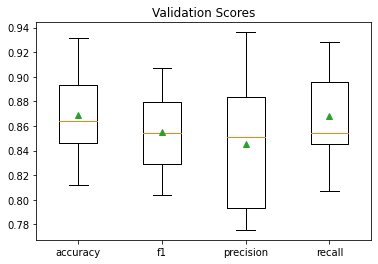

In [ ]:
plt.boxplot(val_rr, labels=_metrics, showmeans=True, showfliers = False)
plt.title('Validation Scores')
plt.show()

#**Ejercicio-6.**

In [ ]:
None

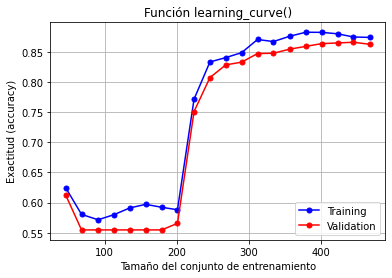

In [ ]:
delta_train_sz = np.linspace(0.1, 1.0, 20)

cvLC = RepeatedKFold(n_splits=5, n_repeats=3)

train_sizes, train_scores, valid_scores = learning_curve(estimator=modelo_svm_F, 
                                                        X=X_train_t, 
                                                        y=np.ravel(y_train),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring='accuracy')



# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud (accuracy)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#**Ejercicio-7.**

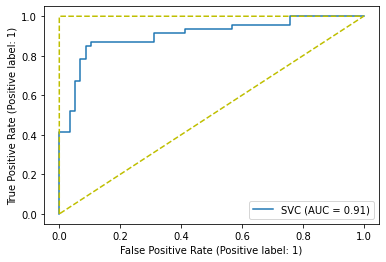

In [ ]:
modelo_svm_F.fit(X_train_t, y_train)
RocCurveDisplay.from_estimator(modelo_svm_F, X_test_t, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')

#**Ejercicio-8.**

Text(0, 0.5, 'F1 Score')

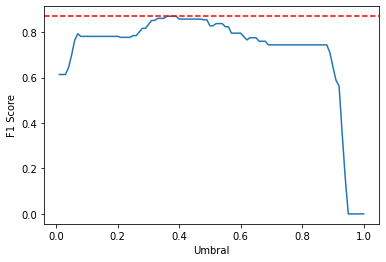

In [ ]:
f1_scores = []
proba = modelo_svm_F.predict_proba(X_test_t)[:,1]

for i in np.linspace(0.01,1,100):

  y_pred = proba > i
  y_pred = np.array(y_pred, dtype = int)

  f1_scores.append(f1_score(y_test, y_pred))

plt.plot(np.linspace(0.01,1,100), f1_scores)
plt.axhline(y=np.max(f1_scores), color='r', linestyle='--')
plt.xlabel('Umbral')
plt.ylabel('F1 Score')


In [ ]:
np.max(f1_scores)

0.8695652173913043

In [ ]:
np.linspace(0.01,1,100)[f1_scores.index(np.max(f1_scores))]

0.36000000000000004

#**Ejercicio-9.**

Text(0, 0.5, 'G-mean Score')

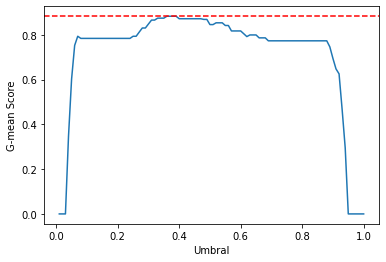

In [223]:
gmean_scores = []
proba = modelo_svm_F.predict_proba(X_test_t)[:,1]
for i in np.linspace(0.01,1,100):

  y_pred = proba > i
  y_pred = np.array(y_pred, dtype = int)

  gmean_scores.append(geometric_mean_score(y_test, y_pred))

plt.plot(np.linspace(0.01,1,100), gmean_scores)
plt.axhline(y=np.max(gmean_scores), color='r', linestyle='--')
plt.xlabel('Umbral')
plt.ylabel('G-mean Score')


In [221]:
np.max(gmean_scores)

0.8829553753744006

In [222]:
np.linspace(0.01,1,100)[gmean_scores.index(np.max(gmean_scores))]

0.36000000000000004

In [226]:
def mi_gmean(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     recall = cm[1][1]/(cm[1][1]+cm[1][0])
     specificity = cm[0][0]/(cm[0][0]+cm[0][1])

     gmean = (recall*specificity)**(1/2)

     return gmean

Text(0, 0.5, 'G-mean Score')

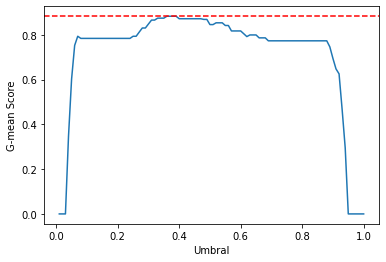

In [227]:
gmean_scores = []
proba = modelo_svm_F.predict_proba(X_test_t)[:,1]
for i in np.linspace(0.01,1,100):

  y_pred = proba > i
  y_pred = np.array(y_pred, dtype = int)

  gmean_scores.append(mi_gmean(y_test, y_pred))

plt.plot(np.linspace(0.01,1,100), gmean_scores)
plt.axhline(y=np.max(gmean_scores), color='r', linestyle='--')
plt.xlabel('Umbral')
plt.ylabel('G-mean Score')

#**Ejercicio-10.**

In [ ]:
None

###**Fin de la Actividad de la semana 8.**